In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Read CSV file
data = np.genfromtxt('to_plot.csv', delimiter=',', skip_header=1)
loop_indices = data[:, 0]
dmrg_energies = data[:, 1]
bond_dimensions = data[:, 2]
# discarded_weights = data[:, 3]

In [3]:
dmrg_energies

array([-5103.75055117, -5103.74964811, -5103.77052491, -5103.78259311,
       -5103.79140035, -5103.7896504 , -5103.8003998 , -5103.81105775,
       -5103.8141469 , -5103.81781546, -5103.82470813, -5103.82805501,
       -5103.83316029, -5103.83663006, -5103.8415639 , -5103.84770484,
       -5103.85012544, -5103.85488245, -5103.85994089, -5103.86160138,
       -5103.86286884, -5103.86600939, -5103.86732294, -5103.87001127,
       -5103.87265307, -5103.87446921, -5103.87517849, -5103.87717679,
       -5103.87784816, -5103.87862196, -5103.87935214, -5103.88020557,
       -5103.88105403, -5103.88165339, -5103.88219292, -5103.88271544,
       -5103.88318038, -5103.88366397, -5103.88400736, -5103.88446038,
       -5103.88477474, -5103.88506182, -5103.88537274, -5103.88565117,
       -5103.8858827 , -5103.88609444])

In [4]:
def plot_correlation(
    feature_1,
    feature_2,
    label_1,
    label_2,
    colours,
    colour_label,
    figNum,
    log_scale=False,
    diagonal_line=False,
    linear_fit=False,
    axis_limits_equal=False,
    title_value=None,
    filename=None,
    label_value=None,
    fit_colour="r",
    marker_shape="o",
    plot_scatter=True,
    new_plot=True,
    last_plot=True,
    plot_line=False,
    linestyle="-",
):
    l_w = 2.0
    fs = 35
    fs2 = 30
    fs3 = fs - 10

    # plt.clf()
    fig = plt.figure(figNum, facecolor="white", figsize=4 * np.array([4, 2.25]))
    ax = plt.gca()
    # if new_plot:
    # ax = plt.subplot()
    # else:
    # ax = plt.gca()

    if plot_line:
        (line,) = ax.plot(
            feature_1,
            feature_2,
            label=label_value,
            marker=marker_shape,
            linestyle=linestyle,
        )

    if plot_scatter:
        # cmap = plt.get_cmap('viridis',19)
        cmap = plt.get_cmap("viridis", None)
        scat_plot = plt.scatter(
            feature_1,
            feature_2,
            c=colours,
            cmap=cmap,
            # vmin=1.5,
            # vmax=402,
            # vmax=20.5,
            vmin=np.amin(colours),
            vmax=np.amax(colours),
            marker=marker_shape,
            label=label_value,
        )

    # plt.ylim(1E-2,1E5)
    if log_scale:
        # plt.yscale("log")
        plt.xscale("log")
    if new_plot:
        cbar = fig.colorbar(scat_plot)
        cbar.set_label(colour_label, rotation=270, fontsize=fs, labelpad=40)
        cbar.ax.tick_params(labelsize=fs)

        # cbar.set_ticks([2,4,6,8,10,12,14,16,18,20])

    # PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
    # plt.colorbar(PCM, ax=ax)

    if axis_limits_equal:
        y_min, y_max = ax.get_ylim()
        x_min, x_max = ax.get_xlim()
        new_min = np.amin([x_min, y_min, np.amin(feature_1), np.amin(feature_2)])
        new_max = np.amax([x_max, y_max, np.amax(feature_1), np.amax(feature_2)])
        new_min = new_min - (0.05 * np.abs(new_min))
        new_max = new_max + (0.05 * np.abs(new_max))
        plt.ylim(new_min, new_max)
        plt.xlim(new_min, new_max)

    if diagonal_line and last_plot:
        ylims = ax.get_ylim()
        xlims = ax.get_xlim()
        x_values = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 30)
        y_values = x_values
        ax.plot(x_values, y_values, linestyle="-", color="black", label="Line of Equality")
        ax.legend(fontsize=fs2)
        ax.set_xlim(xlims)
        ax.set_ylim(ylims)

    if linear_fit:
        x_values = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 30)
        res = linregress(feature_1, feature_2)

        color_value = fit_colour

        plt.plot(
            x_values,
            res.intercept + res.slope * x_values,
            color_value,
            label=r"{1:s}, Lin Fit, s: {0:.2f}".format(res.slope, label_value),
        )
        ax.legend(fontsize=fs2)

    if title_value is not None:
        plt.title(title_value, fontsize=fs + 5)

    # ax.legend(fontsize=fs2)
    plt.xlabel(label_1, fontsize=fs, labelpad=10)
    # plt.ylabel(r"$\log(\mathrm{Extremum of Signal})$", fontsize=fs)
    plt.ylabel(label_2, fontsize=fs, labelpad=20)

    plt.yticks(fontsize=fs)
    plt.xticks(fontsize=fs)
    # ax.xaxis.set_ticks([2,4,6,8,10,12,14,16,18,20])
    # plt.ylim(top=100)
    # plt.ylim(bottom=0.98,top=1.05)

    ax.tick_params(axis="both", width=l_w, which="both")
    ax.tick_params(axis="both", length=5, which="major")
    ax.tick_params(axis="both", length=3, which="minor")
    ##ax.yaxis.set_tick_params(width=l_w)
    ax.spines["top"].set_linewidth(l_w)
    ax.spines["bottom"].set_linewidth(l_w)
    ax.spines["left"].set_linewidth(l_w)
    ax.spines["right"].set_linewidth(l_w)

    # ax.get_yaxis().set_major_formatter(
    # mpl.ticker.FuncFormatter(lambda x, p: format(x, ',')))
    # ax.ticklabel_format(useOffset=False)
    ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
    # ax.legend(prop={'size': 20},
    # loc='upper left',
    # ncol=2,
    # )

    # ax.legend(bbox_to_anchor=(0.995, 0.9),
    # bbox_transform=ax.transAxes,
    # loc='upper right',
    # fontsize=fs2,
    # )

    fig.tight_layout()

    print("Feature 1: ")
    print(np.min(feature_1), np.max(feature_1))
    print(ax.get_xlim())
    print("Feature 2: ")
    print(np.min(feature_2), np.max(feature_2))
    print(ax.get_ylim())

    # Set axis limits
    plt.xlim(1E-3, ax.get_xlim()[-1])
    # plt.ylim(0.0, 1.0)

    if filename is not None:
        fig.savefig(filename, format="pdf", dpi=300)

    return fig, ax



Feature 1: 
0.0015174506828528073 0.2
(0.0011888274240241126, 0.25528527558967706)
Feature 2: 
-5103.88609443987 -5103.74964811446
(-5103.892916756141, -5103.742825798189)


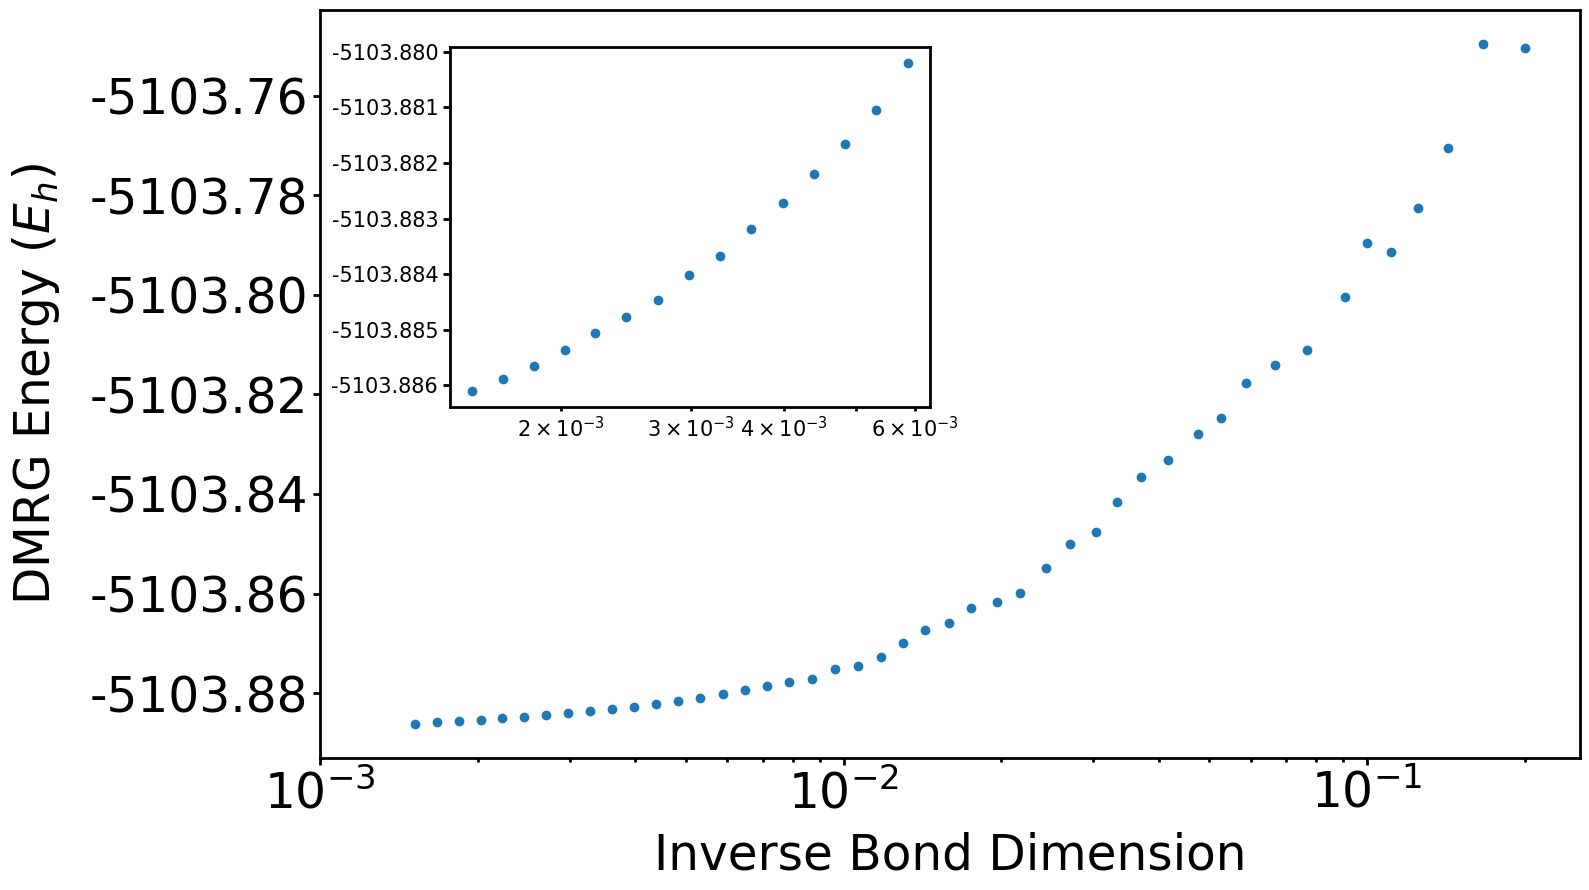

In [6]:
fig, ax = plot_correlation(
    feature_1=1/bond_dimensions,
    feature_2=dmrg_energies,#-np.min(dmrg_energies),
    label_1=r"Inverse Bond Dimension",
    label_2=r"DMRG Energy ($E_h$)",
    colours=None,
    colour_label=None,
    figNum=1,
    log_scale=True,
    diagonal_line=False,
    linear_fit=False,
    axis_limits_equal=False,
    title_value=None,
    filename=None,
    label_value=None,
    fit_colour="r",
    marker_shape="o",
    plot_scatter=False,
    new_plot=False,
    last_plot=True,
    plot_line=True,
    linestyle="None",
)
# Create inset of width 30% and height 40% of the parent axes' bounding box
# at the lower left corner (loc=3)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,zoomed_inset_axes
num_points = 15
axins2 = inset_axes(ax, width="30%", height="40%", bbox_to_anchor=(0.28, -0.05, 1, 1), bbox_transform=fig.transFigure, loc="upper left")
axins2.plot(1/bond_dimensions[-num_points:], dmrg_energies[-num_points:], 'o')
axins2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
plt.xscale("log")
l_w =2.0
fs = 15
axins2.tick_params(axis="both", width=l_w, which="both")
axins2.tick_params(axis="both", length=5, which="major")
axins2.tick_params(axis="both", length=3, which="minor",labelsize=fs)
##ax.yaxis.set_tick_params(width=l_w)
axins2.spines["top"].set_linewidth(l_w)
axins2.spines["bottom"].set_linewidth(l_w)
axins2.spines["left"].set_linewidth(l_w)
axins2.spines["right"].set_linewidth(l_w)
plt.yticks(fontsize=fs)
# plt.xticks(fontsize=fs*10)
#Change fontsize of minor ticks
plt.xticks(fontsize=fs)
# inset_axes = zoomed_inset_axes(ax,
#                                5, # zoom = 0.5
#                                loc=1)
fig.savefig("31_4a_convergence.pdf", format="pdf", dpi=300)
plt.show()